## Setup

In [1]:
import numpy as np
import pandas as pd

# Utilities
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split 

# Basic classifier models
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Ensembling methods
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

# Metrics
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score

#plotting
import seaborn as sns
import matplotlib.pyplot as plt

## Data Preprocessing-Data Cleaning

In [3]:
# Read data frame
red_wine_data = pd.read_csv("data/winequality-red.csv")
white_wine_data = pd.read_csv("data/winequality-white.csv")

# Split and rename columns
new_columns = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides',
              'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
red_wine_data[new_columns] = red_wine_data[red_wine_data.columns[0]].str.split(';', expand=True)
red_wine_data = red_wine_data.drop(columns=red_wine_data.columns[0])

new_columns2 = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides',
              'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
white_wine_data[new_columns2] = white_wine_data[white_wine_data.columns[0]].str.split(';', expand=True)
white_wine_data = white_wine_data.drop(columns=white_wine_data.columns[0])

NameError: name 'pd' is not defined

In [3]:
# Show the red wine data head
red_wine_data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0,2.6,0.098,25,67,0.9968,3.2,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15,54,0.997,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17,60,0.998,3.16,0.58,9.8,6
4,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5


In [4]:
# Show the white wine data head
white_wine_data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7,0.27,0.36,20.7,0.045,45,170,1.001,3,0.45,8.8,6
1,6.3,0.3,0.34,1.6,0.049,14,132,0.994,3.3,0.49,9.5,6
2,8.1,0.28,0.4,6.9,0.05,30,97,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.4,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.4,9.9,6


In [5]:
# Show the statisctics about the red wine data head
for i in range(len(red_wine_data.columns)):
    red_wine_data[red_wine_data.columns[i]] = pd.to_numeric(red_wine_data[red_wine_data.columns[i]])
    if i == len(red_wine_data.columns)-1:
        red_wine_data[red_wine_data.columns[i]].astype(int)
# red_wine_data.head()
red_wine_data.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
# Show the statistics about the white wine data
for i in range(len(white_wine_data.columns)):
    white_wine_data[white_wine_data.columns[i]] = pd.to_numeric(white_wine_data[white_wine_data.columns[i]])
    if i == len(white_wine_data.columns)-1:
        white_wine_data[white_wine_data.columns[i]].astype(int)
# white_wine_data.head()
white_wine_data.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


## Data Preprocessing-EDA

Check for missing value in white_wine_data.

In [7]:
white_wine_data.isna().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Check for missing value in red_wine_data.

In [8]:
red_wine_data.isna().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
# Show the general statistics of red wines
red_wine_data.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [10]:
# Show the general statistics of white wines
white_wine_data.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


The distribution of fixed acidity in white_wine_data.

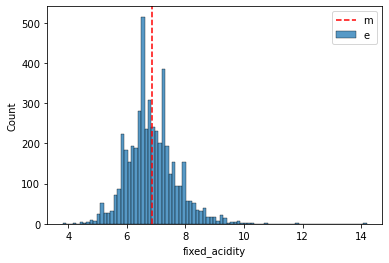

In [11]:
sns.histplot(white_wine_data['fixed_acidity'])
plt.axvline(x=(white_wine_data['fixed_acidity']).mean(), color='red', ls='--')
plt.legend('mean')

The distribution of volatile_acidity in white_wine_data.

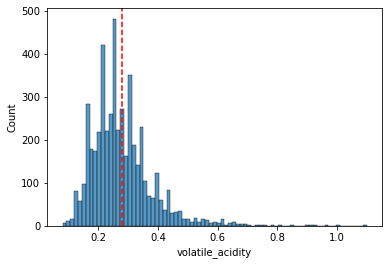

In [12]:
sns.histplot(white_wine_data['volatile_acidity'])
plt.axvline(x=(white_wine_data['volatile_acidity']).mean(), color='red', ls='--')

Visualize some of the variables with respect to quality.

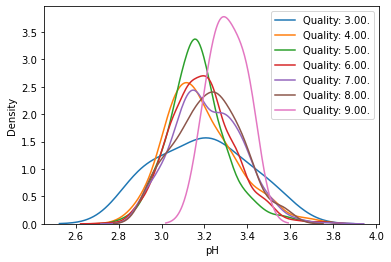

In [13]:
for i in range(11):
    ax = sns.kdeplot(white_wine_data['pH'][white_wine_data['quality'] == i], label= 'Quality: {:.2f}.'.format(i))
ax.legend()

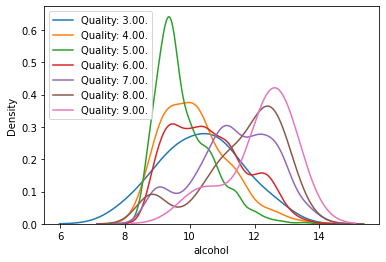

In [14]:
for i in range(11):
    ax = sns.kdeplot(white_wine_data['alcohol'][white_wine_data['quality'] == i], label= 'Quality: {:.2f}.'.format(i))
ax.legend()

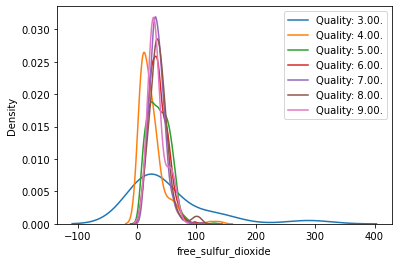

In [15]:
for i in range(11):
    ax = sns.kdeplot(white_wine_data['free_sulfur_dioxide'][white_wine_data['quality'] == i], label= 'Quality: {:.2f}.'.format(i))
ax.legend()

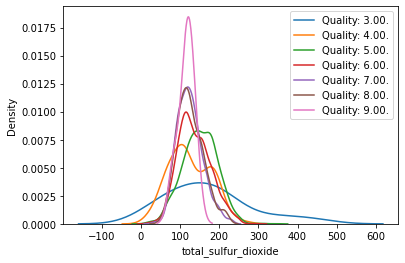

In [16]:
for i in range(11):
    ax = sns.kdeplot(white_wine_data['total_sulfur_dioxide'][white_wine_data['quality'] == i], label= 'Quality: {:.2f}.'.format(i))
ax.legend()

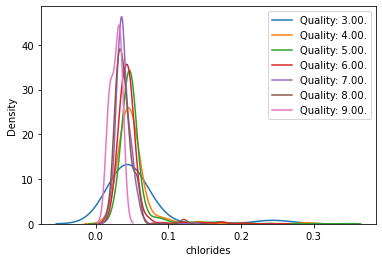

In [17]:
for i in range(11):
    ax = sns.kdeplot(white_wine_data['chlorides'][white_wine_data['quality'] == i], label= 'Quality: {:.2f}.'.format(i))
ax.legend()

In [2]:
# Get input features and output labels
X, y = white_wine_data.drop(columns='quality'), red_wine_data['quality']

# Shuffle the raw data
X, y = shuffle(X, y, random_state=0)

# Generate training, validation and test dataset by using a ration of 8:2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

NameError: name 'white_wine_data' is not defined

## Model Training and testing

In [19]:
accu, accu_bagging = [], [] # Store accuracy scores for comparision

### 1. Decision Tree Classifier

In [20]:
dt = DecisionTreeClassifier().fit(X_train, y_train)
accuracy = dt.score(X_test, y_test)
print('Accuracy: {:.2f}%.'.format(accuracy * 100))
accu.append(accuracy)

# Use bagging
bagging = BaggingClassifier(DecisionTreeClassifier(), 
                            max_samples=0.5, max_features=0.5).fit(X_train, y_train)
accuracy = bagging.score(X_test, y_test)
accu_bagging.append(accuracy)
print(accuracy)

Accuracy: 59.38%.
0.628125


### 2. Random Forest Classifier

In [21]:
# Even better than decision tree classifier with bagging
rf = RandomForestClassifier(n_estimators=500, max_depth=None,
    min_samples_split=2, random_state=0).fit(X_train, y_train)
accuracy = rf.score(X_test, y_test)
print(accuracy)

0.68125


### 3. Extra Tree Classifier

In [22]:
# Not worse than (same as?) a random forest classifier
et = ExtraTreesClassifier(n_estimators=500, max_depth=None,
    min_samples_split=2, random_state=0).fit(X_train, y_train)
accuracy = rf.score(X_test, y_test)
print(accuracy)

0.68125


### 3. K Nearst Neighbor Classifier

In [23]:
# Worst classifier
knn = KNeighborsClassifier().fit(X_train, y_train)
accuracy = knn.score(X_test, y_test)
accu.append(accuracy)
print(accuracy)

0.471875


### 3. Support Vector Machine

### 4.roc_auc

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
def plot_results(gridsearchcv):
    params = gridsearchcv.cv_results_["params"]
    ys = gridsearchcv.cv_results_["mean_test_score"]
    xs = ['|'.join(str(v) for v in param.values()) for param in params]
    yerr = gridsearchcv.cv_results_["std_test_score"]
    plt.errorbar(xs, ys, yerr / np.sqrt(gridsearchcv.cv), fmt='.k')
    plt.ylabel("f1")
    plt.xlabel("params")
    
def check_for_convergence(gridsearchcv):
    return gridsearchcv.best_estimator_.steps[-1][1].n_iter_ < gridsearchcv.best_estimator_.steps[-1][1].max_iter


np.random.seed(31415) 

scaler = StandardScaler()
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
logistic = LogisticRegression(penalty='l1')


pipe = Pipeline(steps=[("scaler", scaler), ("imputer", imp), ("logistic", logistic)])

# you don't need to modify the max_iter param. If you do, keep it under 1000
param_grid = {'logistic__solver':['saga','liblinear']
     # hint, prefix your param names with logistic__ to pass it to the logistic step
     
}



# use f1_micro for scoring
# use 7 folds
gscv = GridSearchCV(estimator = pipe, param_grid = param_grid, cv=7, scoring ='f1_micro')


gscv.fit(X_train, y_train)

/home/y8ye/.local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/y8ye/.local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/y8ye/.local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/y8ye/.local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/y8ye/.local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/y8ye/.local/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarn

GridSearchCV(cv=7,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('imputer', SimpleImputer()),
                                       ('logistic',
                                        LogisticRegression(penalty='l1'))]),
             param_grid={'logistic__solver': ['saga', 'liblinear']},
             scoring='f1_micro')

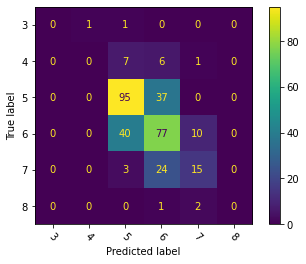

In [32]:
from sklearn.metrics import ConfusionMatrixDisplay, f1_score, confusion_matrix
predictions = gscv.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=gscv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gscv.best_estimator_.classes_)
disp.plot()
plt.xticks(rotation = -45)

plt.show()